In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 9 5 5 6 5 0 9 8 9]
[8 4 1 7 7 3 5 1 0 0]


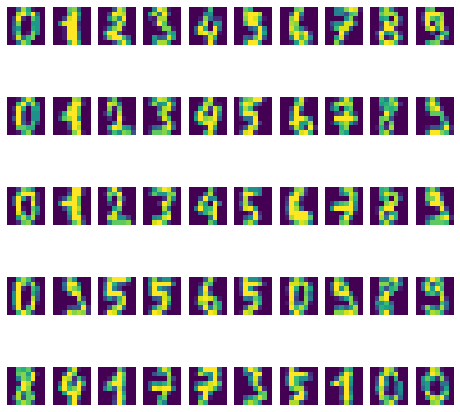

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np


fig, ax = plt.subplots(5, 10, figsize=(8, 8))

for i in range(5):
    for j in range(10):
        ax[i][j].axis('off')
        ax[i][j].imshow(digits.data[10*i+j].reshape(8,8))
    print(digits.target[10*i :10*(i+1)])

        

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init = 'k-means++')
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)
print(kmeans.inertia_)

(10, 64)
1165187.2101064988


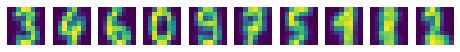

In [4]:
# Visualize the centers
centers = kmeans.cluster_centers_.reshape(10,8,8)
fig, ax = plt.subplots(1, 10, figsize=(8, 8))
for j in range(10): 
    ax[j].axis('off')
    ax[j].imshow(centers[j])

In [5]:
# Label each cluster by the digit that appears most frequently in that cluster.
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
labels[:10]

array([0, 8, 8, 3, 4, 9, 6, 7, 8, 9])

In [6]:
# Compute percentage of correct labels
correct = 0
ndigits = digits.data.shape[0]
for i in range(ndigits):
    if digits.target[i] == labels[i]: correct += 1
print("Accuracy = ", 100*correct/ndigits, "%")

Accuracy =  79.35447968836951 %
